In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [27]:
df = pd.read_csv("heaps.dat", sep=',', header=None)
df.head()

,0,1
0,289973,19483
1,315707,19571
2,306387,19902
3,275641,20684
4,326909,19133


In [28]:
size = np.array(df.loc[:,0],dtype=float)
print(len(size))

2153


In [29]:
size = np.array([x for x in df.loc[1:,0].values])
diffwords = np.array([x for i,x in enumerate(df.loc[1:,1].values)])

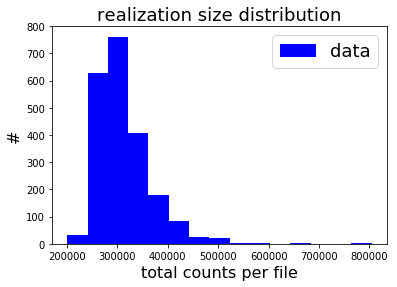

In [30]:
fig = plt.figure()
plt.hist(size, density=False, color='blue', bins = 15, label='data')
plt.title("realization size distribution", fontsize = 18)
plt.xlabel("total counts per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [31]:
fig.savefig("sizeDistr.pdf")

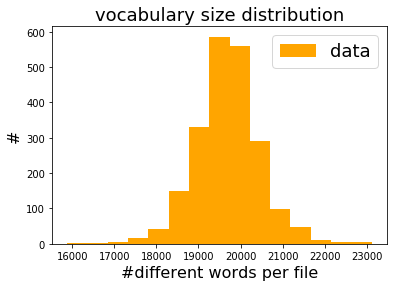

In [32]:
fig = plt.figure()
plt.hist(diffwords, density=False, color='orange', bins = 15, label = 'data')
plt.title("vocabulary size distribution", fontsize=18)
plt.xlabel("#different words per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [33]:
fig.savefig("diffwordsDistr.pdf")

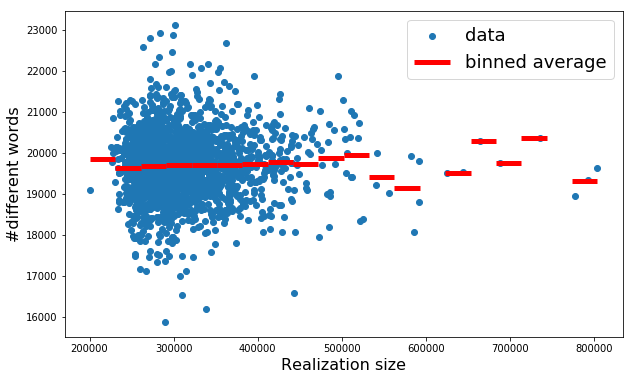

In [34]:
fig = plt.figure(figsize=(10,6))
plt.scatter(size, diffwords, label='data')
plt.xlabel("Realization size", fontsize=16)
plt.ylabel("#different words", fontsize=16)
bin_means, bin_edges, binnumber = stats.binned_statistic(size, diffwords,statistic='mean', bins=20)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5, label='binned average')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(fontsize=18)
plt.show()

In [35]:
fig.savefig("heaps.pdf")

# null model

In [36]:
df_null = pd.read_csv("heaps_null.dat", sep=',', header=None)
df_null.head()

,0,1
0,804406,14258
1,200618,14719
2,225064,14647
3,227001,14701
4,227488,14733


In [37]:
size_null = np.array([x for x in df_null.loc[1:,0].values])
diffwords_null = np.array([x for i,x in enumerate(df_null.loc[1:,1].values)])

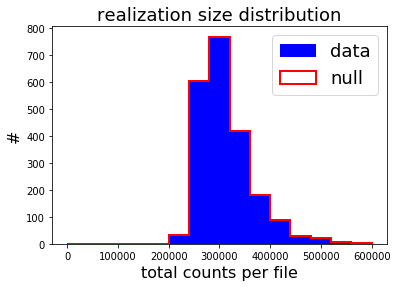

In [38]:
fig = plt.figure()
plt.hist(size, density=False, color='blue', range=(0,600000), bins = 15, label='data')
plt.hist(size_null, density=False, color='red', range=(0,600000), lw=2, histtype='step', bins = 15, label='null')
plt.title("realization size distribution", fontsize = 18)
plt.xlabel("total counts per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [39]:
fig.savefig("sizeDistr_null.pdf")

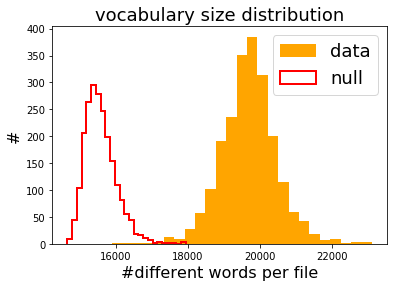

In [40]:
fig = plt.figure()
plt.hist(diffwords, density=False, color='orange', bins = 25, label = 'data')
plt.hist(diffwords_null, density=False, histtype='step', color='red', lw=2, bins = 25, label='null')
plt.title("vocabulary size distribution", fontsize=18)
plt.xlabel("#different words per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [41]:
fig.savefig("diffwordsDistr_null.pdf")

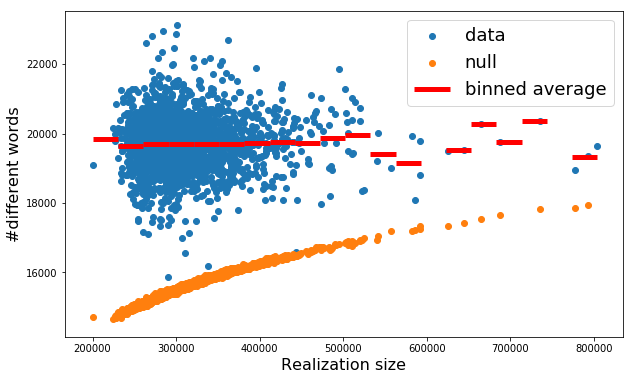

In [42]:
fig = plt.figure(figsize=(10,6))
plt.scatter(size, diffwords, label='data')
plt.scatter(size_null, diffwords_null, label='null')
plt.xlabel("Realization size", fontsize=16)
plt.ylabel("#different words", fontsize=16)
bin_means, bin_edges, binnumber = stats.binned_statistic(size, diffwords,statistic='mean', bins=20)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5, label='binned average')
#bin_means_null, bin_edges_null, binnumber_null = stats.binned_statistic(size_null, diffwords_null, statistic='mean', bins=20)
#plt.hlines(bin_means_null, bin_edges_null[:-1], bin_edges_null[1:], colors='r', lw=5, label='binned average')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(fontsize=18)
plt.show()

In [43]:
fig.savefig("heaps_null.pdf")

### Note
vocabulary_size_null.dat **Must** be sorted 

## null and fulldata

In [44]:
df_lin = pd.read_csv("heaps_lin.dat", sep=',', header=None)
df_lin.head()

,0,1
0,881633,18061
1,900000,0
2,0,5801
3,18368,8173
4,36735,9749


In [45]:
size_lin = np.array([x for x in df_lin.loc[1:,0].values if x >= 0])
diffwords_lin = np.array([x for i,x in enumerate(df_lin.loc[1:,1].values) if x >= 0])

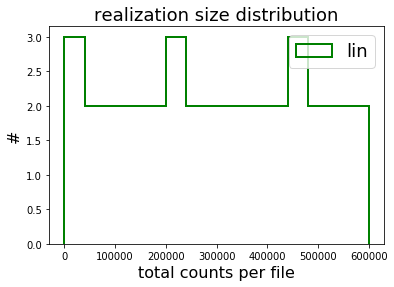

In [46]:
fig = plt.figure()
bins = 15
rang = (0-0.5/600000,600000+0.5/600000)
plt.hist(size_lin, density=False, color='green', range=rang, lw=2, histtype='step', bins = bins, label='lin')
plt.title("realization size distribution", fontsize = 18)
plt.xlabel("total counts per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [47]:
fig.savefig("sizeDistr_lin.pdf")

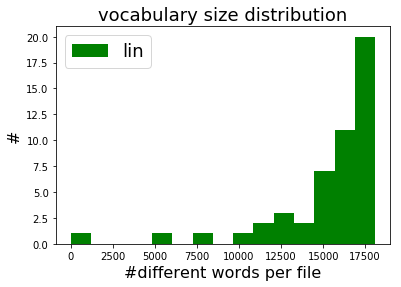

In [48]:
fig = plt.figure()
plt.hist(diffwords_lin, density=False, color='green', bins = 15, label = 'lin')
plt.title("vocabulary size distribution", fontsize=18)
plt.xlabel("#different words per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [49]:
fig.savefig("diffwordsDistr_lin.pdf")

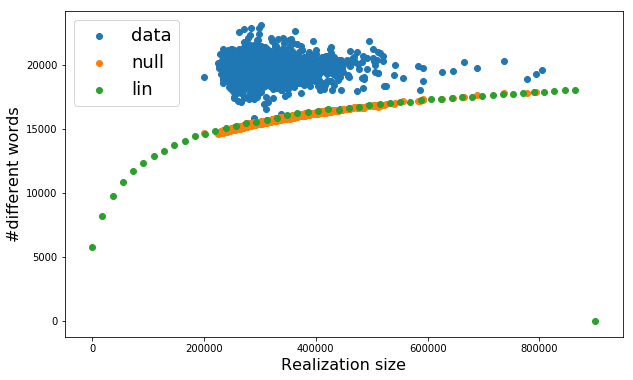

In [50]:
fig = plt.figure(figsize=(10,6))
plt.scatter(size, diffwords, label='data')
plt.scatter(size_null, diffwords_null, label='null')
plt.scatter(size_lin, diffwords_lin, label='lin')
plt.xlabel("Realization size", fontsize=16)
plt.ylabel("#different words", fontsize=16)
bin_means, bin_edges, binnumber = stats.binned_statistic(size, diffwords,statistic='mean', bins=20)
#plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5, label='binned average')
#bin_means_null, bin_edges_null, binnumber_null = stats.binned_statistic(size_null, diffwords_null, statistic='mean', bins=20)
#plt.hlines(bin_means_null, bin_edges_null[:-1], bin_edges_null[1:], colors='r', lw=5, label='binned average')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(fontsize=18)
plt.show()

In [51]:
fig.savefig("heaps_all.pdf")

In [ ]:
lin = np.linspace(0, 900000, num = 50)

In [ ]:
voclin = pd.DataFrame(data = lin)
voclin.head()

In [ ]:
voclin.to_csv("vocabulary_size_lin.dat", header=None, index=None)